<a href="https://colab.research.google.com/github/fleventy-5/worshop/blob/master/nn_using_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CIFAR 10 Data set for understanding model development Sequential model creation Functional API Transfer learning

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


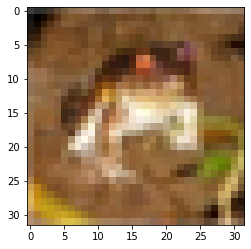

In [3]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0])


In [4]:
print(X_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [5]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
y_train[0]

array([6], dtype=uint8)

In [6]:
#preprocessing

X_train= X_train/255.0
X_test = X_test/255.0

In [7]:
#labels have to be converted to categorical 

y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)
print(y_train[0])


[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [14]:
#model creation using Sequential API
H=32
W=32
c=3
model = keras.Sequential(
     [
      keras.Input(shape=(H,W,c)),
      layers.Conv2D(32,3,activation='relu',padding='same'),#value wont change same or valid
      layers.Conv2D(32,3,activation='relu',padding='same'),
      layers.MaxPooling2D(),

      
      layers.Conv2D(64,3,activation='relu',padding='same'),#value wont change
      layers.Conv2D(64,3,activation='relu',padding='same'),
      layers.MaxPooling2D(),


      
      layers.Conv2D(128,3,activation='relu',padding='same'),#value wont change
      layers.Conv2D(128,3,activation='relu',padding='same'),
      layers.MaxPooling2D(),

      layers.Flatten(),

      layers.Dense(128,activation='relu'),
      layers.Dense(256,activation='relu'),

      layers.Dense(10,activation='softmax')

     ]
 )

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [16]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['Accuracy','Precision','Recall'])#tf.keras.optimizers.Adam()

In [17]:
#use GPU in runtime type
history=model.fit(X_train,y_train,batch_size=64,epochs=10,validation_split=0.2)


Epoch 1/10
625/625 [==============================] - 8s 12ms/step - loss: 1.6263 - Accuracy: 0.3946 - precision: 0.6657 - recall: 0.1754 - val_loss: 1.2161 - val_Accuracy: 0.5584 - val_precision: 0.7386 - val_recall: 0.3891
Epoch 2/10
625/625 [==============================] - 6s 9ms/step - loss: 1.0975 - Accuracy: 0.6053 - precision: 0.7545 - recall: 0.4603 - val_loss: 0.9516 - val_Accuracy: 0.6619 - val_precision: 0.7957 - val_recall: 0.5246
Epoch 3/10
625/625 [==============================] - 6s 10ms/step - loss: 0.8598 - Accuracy: 0.6964 - precision: 0.8009 - recall: 0.5961 - val_loss: 0.8398 - val_Accuracy: 0.7056 - val_precision: 0.7942 - val_recall: 0.6087
Epoch 4/10
625/625 [==============================] - 6s 9ms/step - loss: 0.7100 - Accuracy: 0.7509 - precision: 0.8319 - recall: 0.6750 - val_loss: 0.7425 - val_Accuracy: 0.7416 - val_precision: 0.8153 - val_recall: 0.6745
Epoch 5/10
625/625 [==============================] - 6s 9ms/step - loss: 0.5891 - Accuracy: 0.7928 - 

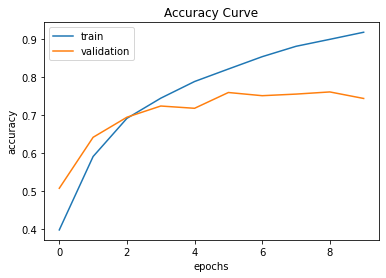

In [13]:
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])
plt.title('Accuracy Curve')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [18]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.8803 - Accuracy: 0.7604 - precision: 0.7902 - recall: 0.7387


[0.8803028464317322,
 0.7603999972343445,
 0.7902225255966187,
 0.7386999726295471]

In [23]:
#Using Pretrain model aka Transfer learning

conv_base =tf.keras.applications.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(32,32,3)
)
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [42]:
#conv_base.trainable=False
conv_base.trainable=True
out = conv_base.get_layer('block3_pool').output
out.shape

TensorShape([None, 4, 4, 256])

In [61]:
# add another layer for testing model performance
x = keras.layers.Conv2D(128,3,activation='relu',padding='same')(out)
x = keras.layers.Conv2D(256,3,activation='relu',padding='same')(x)

x= keras.layers.Flatten()(x)
#improving the model by using dropout and batch normalizration
x = keras.layers.BatchNormalization()(x)

x = keras.layers.Dense(128,activation='relu')(x)

#dropout
x= keras.layers.Dropout(0.2)(x)

x = keras.layers.Dense(256,activation='relu')(x)
outputs= keras.layers.Dense(10,activation='softmax')(x)

model2 = keras.Model(conv_base.input,outputs)

In [55]:
model2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [62]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['Accuracy','Precision','Recall'])

In [63]:
history2=model.fit(X_train,y_train,epochs=10,batch_size=64,validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 6s 10ms/step - loss: 0.0581 - Accuracy: 0.9819 - precision: 0.9831 - recall: 0.9809 - val_loss: 1.6430 - val_Accuracy: 0.7637 - val_precision: 0.7744 - val_recall: 0.7594
Epoch 2/10
625/625 [==============================] - 7s 10ms/step - loss: 0.0631 - Accuracy: 0.9811 - precision: 0.9825 - recall: 0.9799 - val_loss: 1.7514 - val_Accuracy: 0.7481 - val_precision: 0.7572 - val_recall: 0.7433
Epoch 3/10
625/625 [==============================] - 6s 10ms/step - loss: 0.0471 - Accuracy: 0.9854 - precision: 0.9862 - recall: 0.9844 - val_loss: 1.6651 - val_Accuracy: 0.7527 - val_precision: 0.7633 - val_recall: 0.7469
Epoch 4/10
625/625 [==============================] - 6s 9ms/step - loss: 0.0710 - Accuracy: 0.9788 - precision: 0.9803 - recall: 0.9778 - val_loss: 1.5303 - val_Accuracy: 0.7563 - val_precision: 0.7707 - val_recall: 0.7480
Epoch 5/10
625/625 [==============================] - 6s 9ms/step - loss: 0.0493 - Accuracy: 0.9850 -

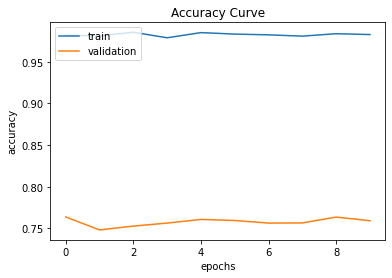

In [68]:
plt.plot(history2.history['Accuracy'])
plt.plot(history2.history['val_Accuracy'])
plt.title('Accuracy Curve')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [69]:
model2.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 4.9630 - Accuracy: 0.0861 - precision: 0.0878 - recall: 0.0618


[4.9630279541015625,
 0.08609999716281891,
 0.08777162432670593,
 0.061799999326467514]

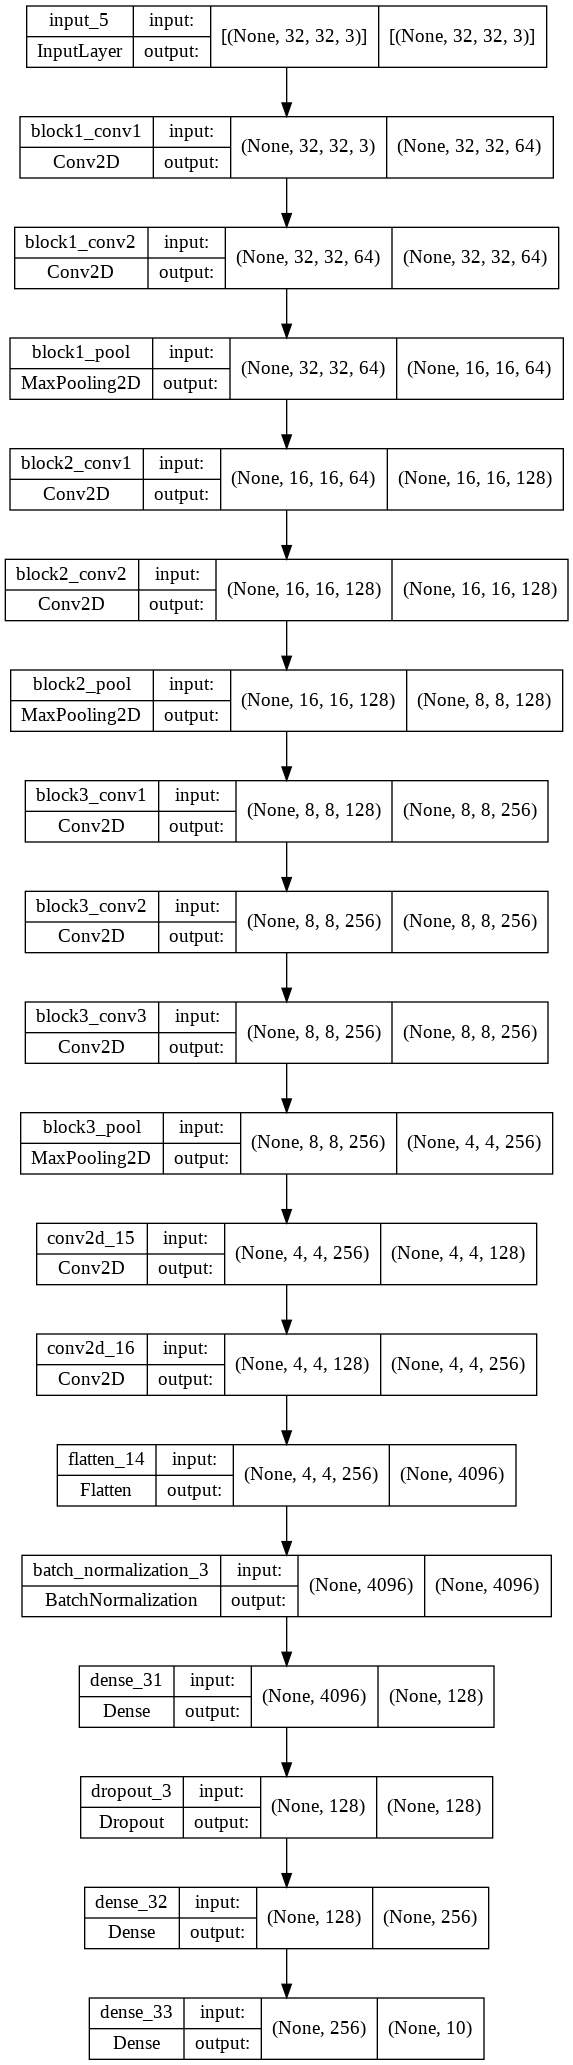

In [67]:
from keras.utils.vis_utils import plot_model
plot_model(model2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)